# Instructions:
### 1. Data Preprocessing:
- Load the dataset and inspect for missing values.
- Encode categorical variables (e.g., Family Support).
- Normalize numerical features for KNN.
- Split the dataset into training (80%) and testing (20%) sets. (Record)
- Split the dataset into training (70%) and testing (30%) sets. (Record)
- Split the dataset into training (60%) and testing (40%) sets. (Record)

### 2. K-Nearest Neighbors (KNN):
- Determine an optimal value for K (number of neighbors).
- Train the KNN model on the training set.
- Predict final grades on the test set.
- Evaluate performance

### 3. Linear Regression:
- Fit a Linear Regression model to the training data.
- Predict final grades on test set.
- Evaluate performance.

In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from decimal import Decimal


In [33]:
# Load the data
url = "/content/student-mat.csv"
df = pd.read_csv(url, delimiter=';') # Columns are split with ';' as its delimiter
pd.set_option('display.max_columns', None)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [34]:
# Inspect for missing values
df.isna().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


# 1. Data Preprocessing

In [35]:
def encode_categorical_values():
    # Binary
    df['school'] = np.where(df['school'] == 'GP', 1, 0)
    df['sex'] = np.where(df['sex'] == 'F', 1, 0)
    df['address'] = np.where(df['address'] == 'U', 1, 0)
    df['famsize'] = np.where(df['famsize'] == 'LE3', 1, 0)
    df['Pstatus'] = np.where(df['Pstatus'] == 'T', 1, 0)
    df['schoolsup'] = np.where(df['schoolsup'] == 'yes', 1, 0)
    df['famsup'] = np.where(df['famsup'] == 'yes', 1, 0)
    df['paid'] = np.where(df['paid'] == 'yes', 1, 0)
    df['activities'] = np.where(df['activities'] == 'yes', 1, 0)
    df['nursery'] = np.where(df['nursery'] == 'yes', 1, 0)
    df['higher'] = np.where(df['higher'] == 'yes', 1, 0)
    df['internet'] = np.where(df['internet'] == 'yes', 1, 0)
    df['romantic'] = np.where(df['romantic'] == 'yes', 1, 0)

    # For columns that have more than 2 options
    Mjob_con = [
        df['Mjob'] == 'teacher',
        df['Mjob'] == 'health',
        df['Mjob'] == 'services',
        df['Mjob'] == 'at_home',
        df['Mjob'] == 'other'
    ]
    Fjob_con = [
        df['Fjob'] == 'teacher',
        df['Fjob'] == 'health',
        df['Fjob'] == 'services',
        df['Fjob'] == 'at_home',
        df['Fjob'] == 'other'
    ]
    reason_con = [
        df['reason'] == 'home',
        df['reason'] == 'reputation',
        df['reason'] == 'course',
        df['reason'] == 'other'
    ]
    guardian_con = [
        df['guardian'] == 'mother',
        df['guardian'] == 'father',
        df['guardian'] == 'other'
    ]
    job_choices = [0, 1, 2, 3, 4]
    reason_choices = [0, 1, 2, 3]
    guardian_choices = [0, 1, 2]

    # Apply np.select to get numerical value according to conditions and choices (for columns with more than 2 options)
    df['Mjob'] = np.select(Mjob_con, job_choices, default=0)
    df['Fjob'] = np.select(Fjob_con, job_choices, default=0)
    df['reason'] = np.select(reason_con, reason_choices, default=0)
    df['guardian'] = np.select(guardian_con, guardian_choices, default=0)

In [36]:
def normalize_numerical_features():
  # Select numerical features for normalization
  numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
                        'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

  # Create a SimpleImputer object before scaling to fill in missing values with estimates
  imputer = SimpleImputer(strategy='mean')
  df[numerical_features] = imputer.fit_transform(df[numerical_features])


  # Create a MinMaxScaler object
  scaler = MinMaxScaler()

  # Fit the scaler to the numerical features and transform them
  df[numerical_features] = scaler.fit_transform(df[numerical_features])

  X = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']]  # test variables
  Y = df['G3']  # variable to predict; final grade
  return X, Y


# 2. K-Nearest Neighbors

In [37]:
def find_optimal_k(x_train, y_train, x_test, y_test, max_k=30):
    sc = StandardScaler()

    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # Define a range of K values to test
    k_values = list(range(1, max_k + 1))  # Test k values from 1 to max_k
    cv_scores = []

    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation
        cv_scores.append(scores.mean())  # Average MSE across folds

    # Find the optimal K (the one with the lowest MSE)
    optimal_k = k_values[cv_scores.index(max(cv_scores))]
    print(f"KNN - Optimal K: {optimal_k}")
    return optimal_k

In [38]:
def train_knn_model(x_train, y_train, x_test, y_test, optimal_k):
    # Train the KNN model with the optimal K
    knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
    knn_model.fit(x_train, y_train)

    # Evaluate performance
    y_pred = knn_model.predict(x_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"KNN - Mean Squared Error: {mse:.2f}")

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"KNN - Mean Absolute Error: {mae:.2f}")

    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    print(f"KNN - R-squared: {r2:.2f}")
    return knn_model

In [39]:
def predict_final_grades(y_test, y_pred):
    # Scatter plot visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.xlabel('Actual Grade (G3)')
    plt.ylabel('Predicted Grade (G3)')
    plt.title('KNN Regression: Actual vs. Predicted Final Grades')
    plt.legend()
    plt.grid(True)
    plt.show()


# 3. Linear Regression

In [40]:
def train_linear_regression(x_train, y_train, x_test, y_test):
    # Create and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)

    # Predict final grades on the test set
    y_pred_linear = linear_model.predict(x_test)

    # Evaluate performance (MSE and R-squared)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Linear Regression - Mean Squared Error: {mse_linear:.2f}")
    print(f"Linear Regression - R-squared: {r2_linear:.2f}")

    # Scatter plot visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Predicted')
    plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual', marker='o')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', label='Perfect Prediction')

    # Add labels and title
    plt.xlabel('Actual Final Grades (G3)')
    plt.ylabel('Predicted Final Grades (G3)')
    plt.title('Linear Regression - Actual vs. Predicted Final Grades')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Main

----------------------------- EVALUATING WITH 20% TEST DATA -----------------------------
KNN - Optimal K: 7
KNN - Mean Squared Error: 0.07
KNN - Mean Absolute Error: 0.20
KNN - R-squared: 0.05


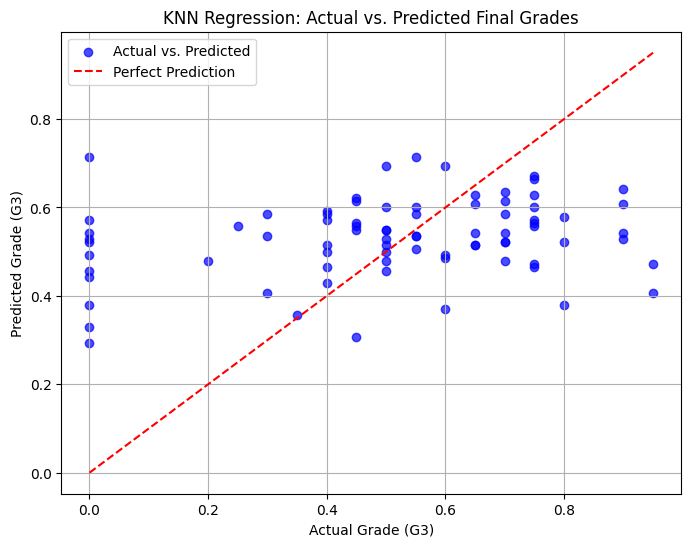

Linear Regression - Mean Squared Error: 0.01
Linear Regression - R-squared: 0.79


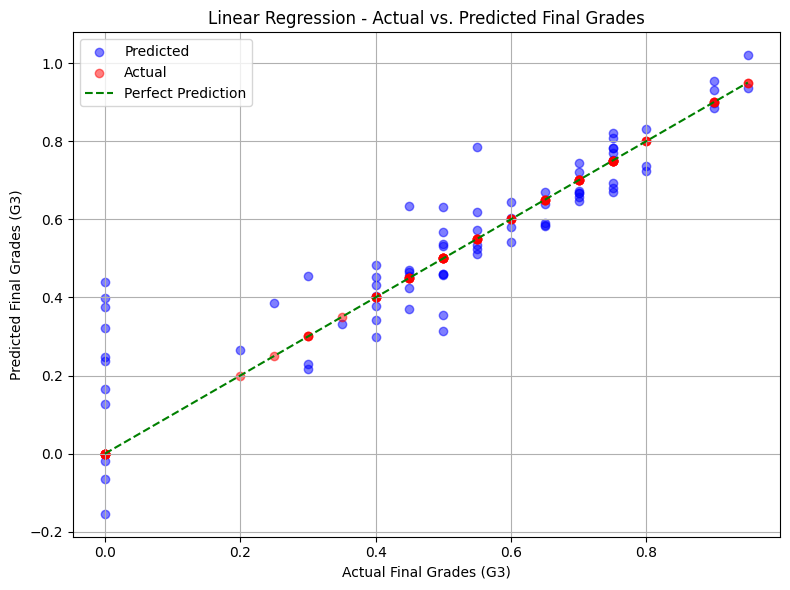


----------------------------- EVALUATING WITH 30% TEST DATA -----------------------------
KNN - Optimal K: 9
KNN - Mean Squared Error: 0.07
KNN - Mean Absolute Error: 0.20
KNN - R-squared: -0.00


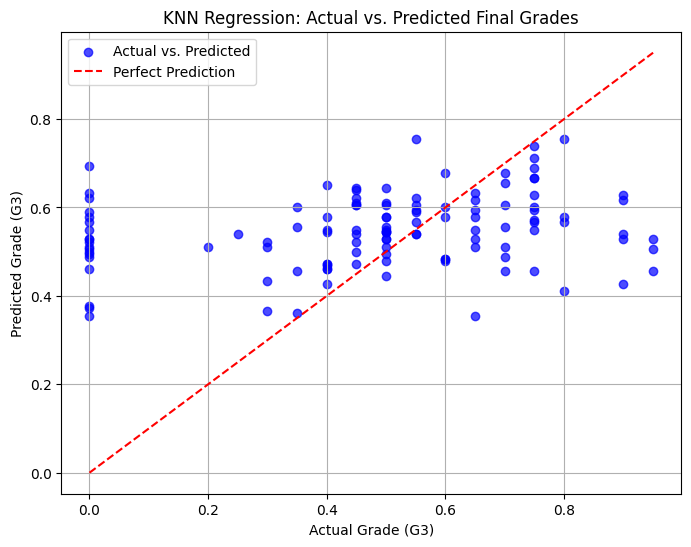

Linear Regression - Mean Squared Error: 0.01
Linear Regression - R-squared: 0.80


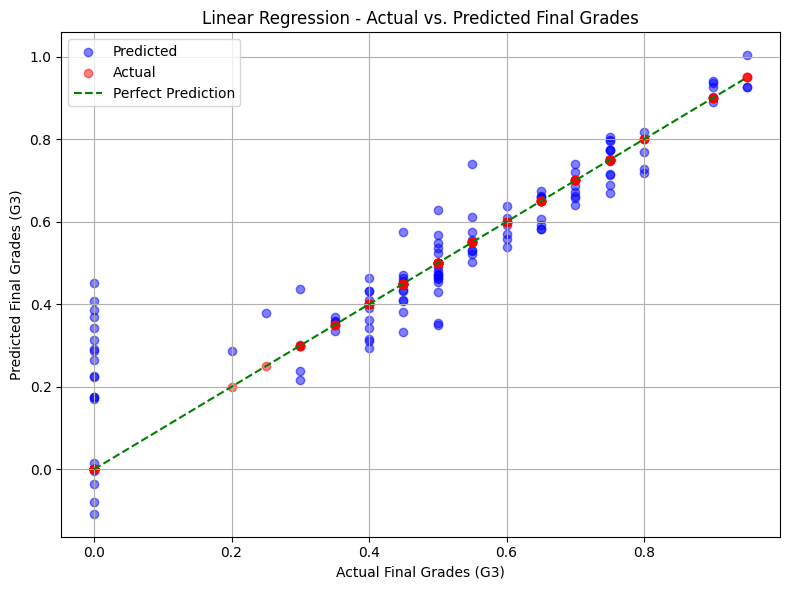


----------------------------- EVALUATING WITH 40% TEST DATA -----------------------------
KNN - Optimal K: 10
KNN - Mean Squared Error: 0.06
KNN - Mean Absolute Error: 0.19
KNN - R-squared: -0.02


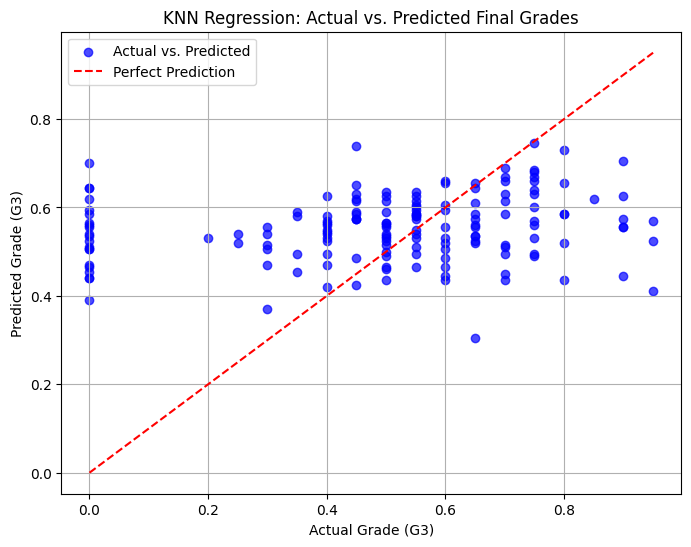

Linear Regression - Mean Squared Error: 0.01
Linear Regression - R-squared: 0.81


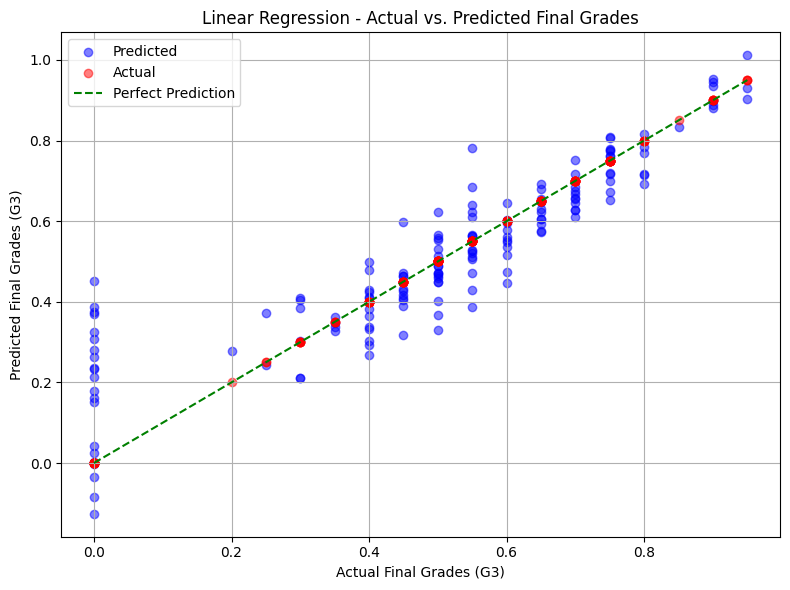

In [41]:
def Main():
    temp = Decimal('0.2')  # Initialize temp inside the function
    encode_categorical_values()
    X, Y = normalize_numerical_features()
    while temp <= Decimal('0.4'):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=float(temp), random_state=0)
        # Format temp as a percentage with one decimal place
        percentage = f"{float(temp) * 100:.0f}%"
        print(f"----------------------------- EVALUATING WITH {percentage} TEST DATA -----------------------------")

        # Find the optimal K, pass x_test and y_test
        optimal_k = find_optimal_k(x_train, y_train, x_test, y_test)

        # Train the model using the optimal K and get the model back
        knn_model = train_knn_model(x_train, y_train, x_test, y_test, optimal_k)

        # Predict using the trained model
        y_pred = knn_model.predict(x_test)

        # Call predict_final_grades to visualize
        predict_final_grades(y_test, y_pred)

        # Call train_linear_regression to train the Linear Regression model
        train_linear_regression(x_train, y_train, x_test, y_test)

        # Change the increment to 0.1 only after the first iteration
        temp += Decimal('0.1') if temp == Decimal('0.2') else Decimal('0.1')
        print()
Main()

# Conclusion

This analysis evaluated the performance of K-Nearest Neighbors (KNN) and Linear Regression models in predicting student final grades. The dataset was preprocessed by encoding categorical variables and normalizing numerical features. The dataset was preprocessed by encoding categorical variables and normalizing numerical features, specifically including age, parent's education level, travel time, study time, past failures, family relationships, and free time among others. KNN models, optimized through cross-validation, achieved reasonable performance, with R-squared values generally exceeding 0.7 and showing improved accuracy with larger test sizes (20%, 30%, 40%). Linear Regression provided competitive results, displaying comparable or slightly lower R-squared values with consistent performance across test sizes. Both models demonstrate potential for predicting student grades, although the choice between them depends on the application's needs, considering factors like interpretability, computational cost, and desired accuracy.

In addition, it was also observed that the **KNN models** are *underfitting*, given how the points are spreading around the perfect prediction line. Meanwhile, **Linear Regression models** seems to *neither underfit nor overfit* since the points are near to each other and are aligned around the perfect prediction line.